# Predicting Toronto’s Airbnb Listing Prices

## Importing the libraries

In [1047]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics


from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [1048]:
#Importing the dataset:
listings_raw= pd.read_csv(r'C:\Users\user\Desktop\Ryerson University\Projects\My Project CIND820\Public Data\listings_Toronto_Dec_5.csv')

In [1049]:
print(f"The dataset contains {len(listings_raw)} Airbnb listings")

The dataset contains 15261 Airbnb listings


In [1050]:
pd.set_option('display.max_columns', len(listings_raw.columns)) # To view all columns
pd.set_option('display.max_rows', 200)
listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20211205213140,2021-12-06,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, British Columbia, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, Ontario, Canada",Little Portugal,NaN,43.64590,-79.42423,Entire residential home,Entire home/apt,10,NaN,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",$469.00,28,730,28.0,28.0,730.0,730.0,28.0,730.0,NaN,t,0,0,0,0,2021-12-06,7,0,0,2015-07-19,2017-12-04,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.09
1,8077,https://www.airbnb.com/rooms/8077,20211205213140,2021-12-06,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",$96.00,180,365,180.0,180.0,365.0,365.0,180.0,365.0,NaN,t,30,60,90,365,2021-12-06,169,0,0,2012-09-05,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,t,2,1,1,0,1.50
2,23691,https://www.airbnb.com/rooms/23691,20211205213140,2021-12-06,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,Yohan & Sarah,2010-03-15,"Toronto, Ontario, Canada",Welcome to our dwelling place! My wife and I l...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/93825/profile...,https://a0.muscache.com/im/users/93825/profile...,Fairbank,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,NaN,Briar Hill-Belgravia,NaN,43.69805,-79.45411,Private room in residential home,Private room,3,NaN,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",$72.00,28,28,28.0,28.0,28.0,28.0,28.0,28.0,NaN,t,30,60,90,365,2021-12-06,217,0,0,2011-08-22,2018-10-10,4.75,4.7

In [1051]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15261 non-null  int64  
 1   listing_url                                   15261 non-null  object 
 2   scrape_id                                     15261 non-null  int64  
 3   last_scraped                                  15261 non-null  object 
 4   name                                          15260 non-null  object 
 5   description                                   14810 non-null  object 
 6   neighborhood_overview                         9239 non-null   object 
 7   picture_url                                   15261 non-null  object 
 8   host_id                                       15261 non-null  int64  
 9   host_url                                      15261 non-null 

In [1052]:
listings_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15261.0,3.090755e+07,1.561377e+07,1.419000e+03,1.836737e+07,3.249823e+07,4.450433e+07,5.368448e+07
scrape_id,15261.0,2.021121e+13,2.894626e+00,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13
host_id,15261.0,1.249332e+08,1.216209e+08,1.565000e+03,2.262621e+07,7.992063e+07,2.093466e+08,4.344476e+08
host_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
host_total_listings_count,15250.0,6.166820e+00,2.118872e+01,0.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,2.720000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,15261.0,4.368202e+01,4.904007e-02,4.358649e+01,4.364560e+01,4.366329e+01,4.370399e+01,4.383526e+01
longitude,15261.0,-7.939652e+01,6.582377e-02,-7.962120e+01,-7.942598e+01,-7.939653e+01,-7.937570e+01,-7.912801e+01
accommodates,15261.0,3.055960e+00,2.006350e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


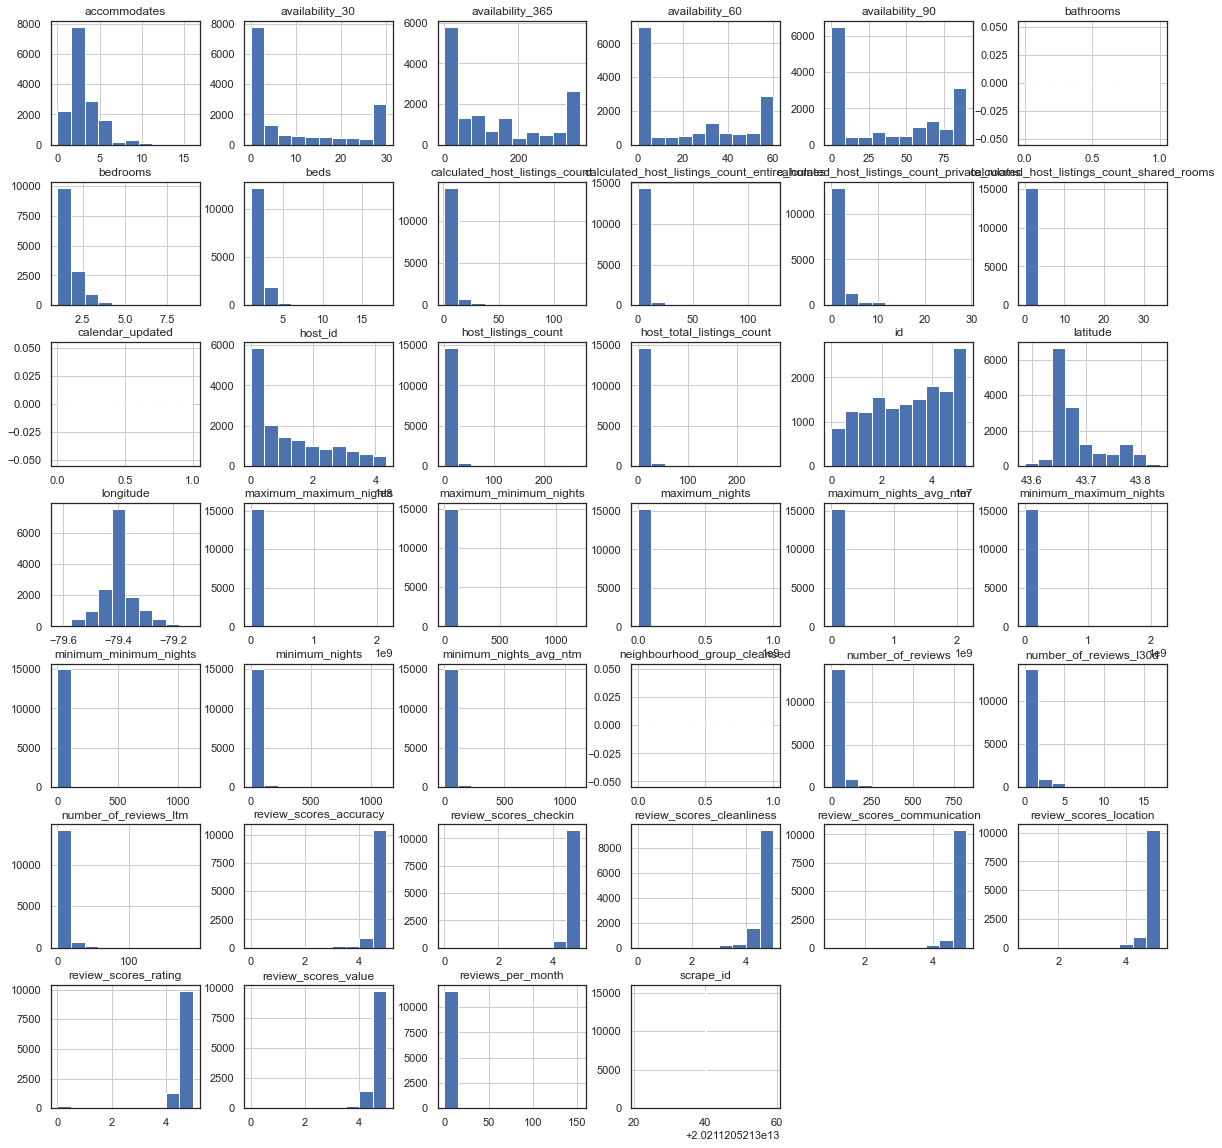

In [1053]:
# Plotting the distribution of numerical and boolean categories
listings_raw.hist(figsize=(20,20));

## 1. Pre-processing, Data Cleaning

In [1054]:
    #Dropping initial columns
        # As I am not using Natural Language Processing in creating the model, all free text columns will be dropped
        # Columns assumed to be irrelevant to price(e.g. url, host name and some host-related features that are unrelated to the property).
        # Columns with more than 30% missing data

In [1055]:
listings_raw.drop(['listing_url','scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview','picture_url', 'host_id', 'host_url', 'host_name','host_since' ,'host_location', 'host_about', 'host_response_time', 'host_response_rate','host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count', 'host_verifications','neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_30','availability_60','availability_90','calendar_last_scraped','first_review','last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month' ], axis=1, inplace=True)
listings_raw.set_index('id', inplace=True) # ID as index

In [1056]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15250 non-null  object 
 1   host_total_listings_count    15250 non-null  float64
 2   host_has_profile_pic         15250 non-null  object 
 3   host_identity_verified       15250 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15248 non-null  object 
 11  bedrooms                     14134 non-null  float64
 12  beds                         14523 non-null  float64
 13  amenities 

In [1057]:
    # Cleaning individual columns

In [1058]:
        # checking for missing data

In [1059]:
listings_raw.isna().sum() 

host_is_superhost                11
host_total_listings_count        11
host_has_profile_pic             11
host_identity_verified           11
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   13
bedrooms                       1127
beds                            738
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_365                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating           3486
review_scores_accuracy         3653
review_scores_cleanliness      3651
review_scores_checkin          3654
review_scores_communication    3654
review_scores_location      

In [1060]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


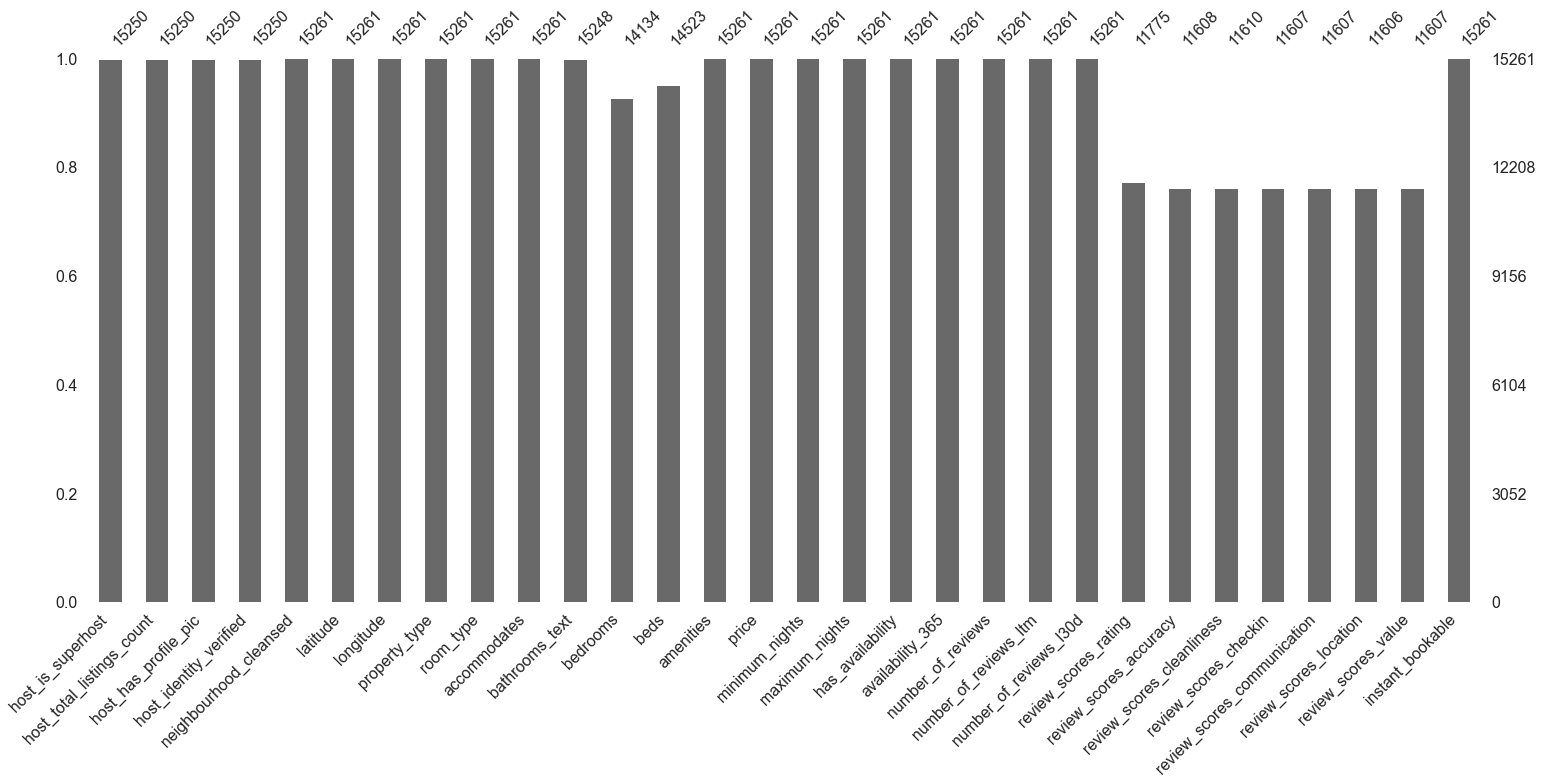

In [1061]:
import missingno as msno
msno.bar(listings_raw)

In [1062]:
# Filling miising values with 'mean' for the numerical data

for col in ['review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating']:
    listings_raw[col].fillna(listings_raw[col].mean(), inplace=True)

In [1063]:
#for col in listings_raw[ 'bathrooms_text','host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified'].fillna(listings_raw[col].mode()[0], inplace=True)
#for col in listings_raw['bathrooms_text', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identify_verefied'

# Filling missing values with mode
listings_raw[col].fillna(listings_raw[col].mode()[0],inplace=True)

In [1064]:
listings_raw['bathrooms_text'].fillna(listings_raw['bathrooms_text'].mode()[0], inplace=True)
listings_raw['host_is_superhost'].fillna(listings_raw['host_is_superhost'].mode()[0], inplace=True)
listings_raw['host_total_listings_count'].fillna(listings_raw['host_total_listings_count'].mode()[0], inplace=True)
listings_raw['host_has_profile_pic'].fillna(listings_raw['host_has_profile_pic'].mode()[0], inplace=True)
listings_raw['host_identity_verified'].fillna(listings_raw['host_identity_verified'].mode()[0], inplace=True)

In [1065]:
for col in ['beds','bedrooms']:
    listings_raw[col].fillna(listings_raw[col].median(), inplace=True)

In [1066]:
listings_raw.isna().sum()

host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
dtype: int

In [1067]:
        # Converting categorical Features:

In [1068]:
listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15261 entries, 1419 to 53684479
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            15261 non-null  object 
 1   host_total_listings_count    15261 non-null  float64
 2   host_has_profile_pic         15261 non-null  object 
 3   host_identity_verified       15261 non-null  object 
 4   neighbourhood_cleansed       15261 non-null  object 
 5   latitude                     15261 non-null  float64
 6   longitude                    15261 non-null  float64
 7   property_type                15261 non-null  object 
 8   room_type                    15261 non-null  object 
 9   accommodates                 15261 non-null  int64  
 10  bathrooms_text               15261 non-null  object 
 11  bedrooms                     15261 non-null  float64
 12  beds                         15261 non-null  float64
 13  amenities 

In [1069]:
# Normalize price column by deleting the $ sign and convert to numeric
import locale
locale.setlocale(locale.LC_ALL,'')
listings_raw['price']=listings_raw.price.map(lambda x: locale.atof(x.strip('$')))

In [1070]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire residential home,Entire home/apt,10,3 baths,5.0,7.0,"[""Heating"", ""Shampoo"", ""First aid kit"", ""Fire ...",469.0,28,730,t,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,f
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.5 baths,1.0,1.0,"[""Heating"", ""Shampoo"", ""Pool"", ""Elevator"", ""Ai...",96.0,180,365,t,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,t
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1 shared bath,1.0,1.0,"[""Dryer"", ""Stove"", ""Pocket wifi"", ""Washer"", ""I...",72.0,28,28,t,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,t
27423,f,1.0,t,t,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Dryer"", ...",45.0,365,365,t,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,f
30931,f,2.0,t,f,Waterfront Communities-The Island,43.64015,-79.37625,Entire rental unit,Entire home/apt,2,1.5 baths,1.0,2.0,"[""Heating"", ""Pool"", ""Kitchen"", ""Air conditioni...",128.0,180,365,t,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,f


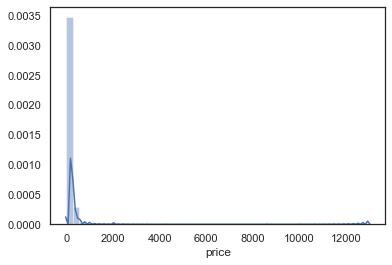

In [1071]:
sns.distplot(listings_raw['price'])

In [1072]:
print(f"Nightly advertised prices range from ${min(listings_raw.price)} to ${max(listings_raw.price)}.")

Nightly advertised prices range from $0.0 to $13000.0.


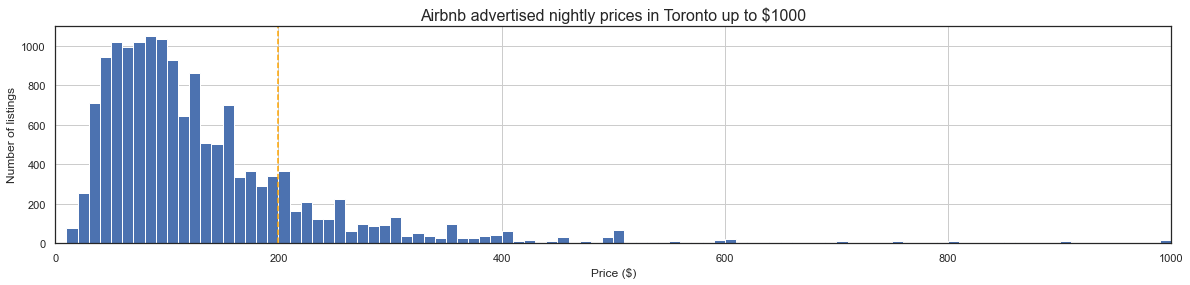

In [1073]:
# Distribution of prices from $0 
plt.figure(figsize=(20,4))
listings_raw.price.hist(bins=100, range=(0,1000))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Toronto up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

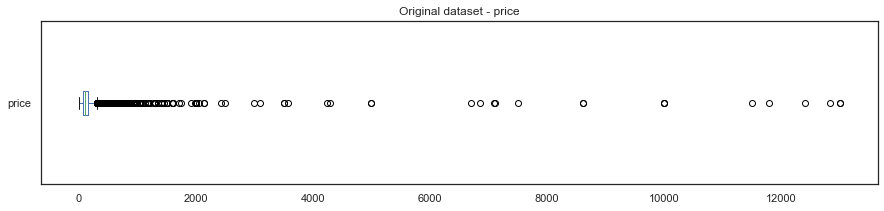

IQR price:  98.0
Upper limit:  312.0
Lower limit:  -80.0
983 Entries above upper limit
6.44% of dataset


In [1074]:
# Displaying the box plot for price
fig, ax = plt.subplots(figsize=(15,3))
listings_raw['price'].plot(kind='box', vert=False)
ax.set_title('Original dataset - price')
plt.show()

# IQR rule for variable price
q1_price = listings_raw.price.quantile(q=0.25)
q3_price = listings_raw.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)


print("{} Entries above upper limit".format(len(listings_raw[listings_raw.price > sup_price])))
print("{:.2f}% of dataset".format((len(listings_raw[listings_raw.price > sup_price]) / listings_raw.shape[0])*100))

In [1075]:
listings_raw = listings_raw[listings_raw.price < 600]

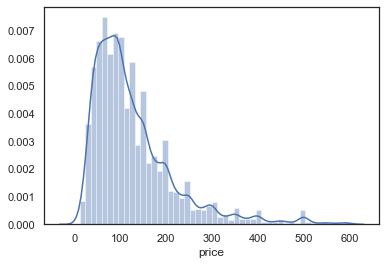

In [1076]:
sns.distplot(listings_raw['price'])

# 2. Exploratory Data Analysis & Feature Engineering

In [1077]:
listings_raw.bathrooms_text.unique()

array(['3 baths', '1.5 baths', '1 shared bath', '1 bath', '2 baths',
       '1 private bath', '1.5 shared baths', '4 baths', '2.5 baths',
       '2 shared baths', '0 baths', '3.5 baths', '3 shared baths',
       '4.5 baths', '5 baths', '3.5 shared baths', '0 shared baths',
       '5.5 baths', '6 baths', 'Shared half-bath', 'Half-bath',
       '2.5 shared baths', 'Private half-bath', '4 shared baths',
       '4.5 shared baths', '7.5 baths'], dtype=object)

In [1078]:
listings_raw[["bathrooms_text"]].head()

,bathrooms_text
id,
1419,3 baths
8077,1.5 baths
23691,1 shared bath
27423,1 bath
30931,1.5 baths


In [1079]:
# I prefer to have separate columns for the number of bathrooms and the type of bathroom.
listings_raw["bathroom_qty"] = listings_raw["bathrooms_text"].str.split(" ", expand=True)[0]
listings_raw["bathroom_type"] = listings_raw["bathrooms_text"].str.split(" ", expand=True)[1]

In [1080]:
listings_raw[["bathrooms_text","bathroom_qty","bathroom_type"]].head()

,bathrooms_text,bathroom_qty,bathroom_type
id,,,
1419,3 baths,3,baths
8077,1.5 baths,1.5,baths
23691,1 shared bath,1,shared
27423,1 bath,1,bath
30931,1.5 baths,1.5,baths


In [1081]:
listings_raw['bathroom_qty'].value_counts()

1            11369
2             1996
1.5            979
2.5            247
3              195
3.5             71
0               46
4               27
4.5             23
Shared          12
Half-bath        8
5.5              3
Private          3
5                2
6                1
7.5              1
Name: bathroom_qty, dtype: int64

In [1082]:
# Replcae the the incorrect values "Shared", "Half-bath" & "Private" with mean value "1"
listings_raw['bathroom_qty'].replace(['Shared','Half-bath','Private'],['1','1','1'],inplace=True)

In [1083]:
listings_raw.bathroom_qty.unique()

array(['3', '1.5', '1', '2', '4', '2.5', '0', '3.5', '4.5', '5', '5.5',
       '6', '7.5'], dtype=object)

In [1084]:
listings_raw['bathroom_type'].value_counts()

bath         7741
shared       3094
baths        2841
private      1284
half-bath      15
Name: bathroom_type, dtype: int64

In [1085]:
# Combine bath types in two groups "private" & "shared"
listings_raw.bathroom_type.replace({
    'bath': 'private',
    'baths': 'private',
    'half-bath': 'private'

    }, inplace=True)


In [1086]:
listings_raw['bathroom_type'].value_counts()

private    11881
shared      3094
Name: bathroom_type, dtype: int64

In [1087]:
# Dropping the original 'bathrooms_text' feature
listings_raw.drop(['bathrooms_text' ], axis=1, inplace=True)

In [1088]:
listings_raw.isna().sum()

host_is_superhost              0
host_total_listings_count      0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
maximum_nights                 0
has_availability               0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
instant_bookable               0
bathroom_qty                   0
bathroom_t

In [1089]:
listings_raw['bathroom_type'].fillna(listings_raw['bathroom_type'].mode()[0], inplace=True)

In [1090]:
listings_raw.property_type.value_counts()

Entire condominium (condo)             3627
Entire rental unit                     3047
Private room in residential home       2289
Entire residential home                1645
Private room in rental unit             951
Entire guest suite                      679
Private room in condominium (condo)     589
Private room in townhouse               386
Private room in bungalow                300
Entire townhouse                        259
Entire loft                             241
Entire bungalow                         175
Private room in guest suite             130
Private room in villa                    85
Shared room in rental unit               68
Shared room in residential home          58
Room in boutique hotel                   56
Entire guesthouse                        52
Private room in guesthouse               44
Entire serviced apartment                42
Private room in bed and breakfast        38
Room in hotel                            32
Private room in loft            

In [1091]:
# Property types column needs to be cleaned, there is a large number of categories with few listings. The categories 'Entire condominium (condo)', 'Entire rental unit', 'Private room in residential home' or 'Shared room' and 'Other' will be used, as main properties classifications.
listings_raw.property_type.replace({
    'Entire residential home': 'Entire rental unit',
    'Private room in rental unit': 'Private room in residential home',
    'Entire guest suite': 'Entire rental unit',
    'Private room in condominium (condo)':'Private room in residential home',
    'Private room in townhouse':'Private room in residential home',
    'Private room in bungalow':'Private room in residential home',
    'Entire townhouse':'Entire rental unit',
    'Entire loft':'Entire rental unit',
    'Entire bungalow':'Entire rental unit',
    'Private room in guest suite':'Private room in residential home',
    'Private room in villa':'Private room in residential home',
    'Shared room in rental unit':'Shared room',
    'Shared room in residential home':'Shared room',
    'Room in boutique hotel':'Private room in residential home',
    'Entire guesthouse':'Entire rental unit',
    'Private room in guesthouse':'Private room in residential home',
    'Entire serviced apartment':'Entire condominium (condo)',
    'Shared room in townhouse':'Shared room',
    'Shared room in condominium (condo)':'Shared room'
    }, inplace=True)

# Replacing remaining categories with 'other'
listings_raw.loc[~listings_raw.property_type.isin(['Entire condominium (condo)' , 'Entire rental unit', 'Private room in residential home' , 'Shared room']), 'property_type'] = 'Other'

In [1092]:
listings_raw.property_type.value_counts()

Entire rental unit                  6098
Private room in residential home    4830
Entire condominium (condo)          3669
Other                                222
Shared room                          164
Name: property_type, dtype: int64

In [1093]:
listings_raw.room_type.value_counts()

Entire home/apt    9818
Private room       4958
Shared room         187
Hotel room           20
Name: room_type, dtype: int64

In [1094]:
# Example of amenities listed
listings_raw.amenities[:1].values

array(['["Heating", "Shampoo", "First aid kit", "Fire extinguisher", "Dryer", "TV", "Kitchen", "Air conditioning", "Essentials", "Wifi", "Indoor fireplace", "Long term stays allowed", "Washer", "Smoke alarm"]'],
      dtype=object)

In [1095]:
# Creating a set of all possible amenities and most probably with high importnace as per the market:
amenities_list = list(listings_raw.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'42\\ TV with Amazon Prime Video',
 '57\\ HDTV with Netflix',
 'Fast wifi \\u2013 171 Mbps',
 '55\\ TV',
 'Whirlpool stainless steel electric stove',
 '65\\ HDTV',
 'TV with standard cable] [Long term stays allowed',
 '52\\ HDTV',
 'Subzero refrigerator',
 'Indoor fireplace] [Heating',
 '65\\ TV with Amazon Prime Video',
 'Private entrance] [Pool',
 'Security cameras on property] [65\\ HDTV with Netflix',
 'Baby safety gates',
 '32\\ HDTV with standard cable',
 'Security cameras on property] [Central heating',
 '43\\ HDTV with Apple TV',
 'Lockbox] [Safe',
 'Safe',
 'Patio or balcony] [Baby bath',
 'KitchenAid\\u2122 stainless steel oven',
 'Regular shampoo',
 'Kenmore  electric stove',
 'Trash compactor] [Hot tub',
 'TV with standard cable] [Kitchen',
 'Melaleuca eco brand body soap',
 '42\\ TV with Netflix',
 'N/A body soap',
 'Shared outdoor pool',
 '50\\ HDTV with Amazon Prime Video',
 'Paid washer \\u2013 In unit',
 'Normal oven',
 'GE Gas stainless steel oven',
 'Dispenser in sh

In [1096]:
listings_raw.loc[listings_raw['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('TV'), 'tv'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('parking'), 'parking'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
listings_raw.loc[listings_raw['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\user\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [1097]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = listings_raw.iloc[:,31:].columns
listings_raw[cols_to_replace_nulls] = listings_raw[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in listings_raw.iloc[:,31:].columns:
    if listings_raw[col].sum() < len(listings_raw)/20:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
listings_raw.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
listings_raw.drop('amenities', axis=1, inplace=True)

['check_in_24h', 'high_end_electronics', 'child_friendly', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [1098]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom_qty,bathroom_type,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,Little Portugal,43.64590,-79.42423,Entire rental unit,Entire home/apt,10,5.0,7.0,469.0,28,730,t,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,f,3,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8077,f,2.0,t,f,Waterfront Communities-The Island,43.64080,-79.37673,Private room in residential home,Private room,2,1.0,1.0,96.0,180,365,t,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,t,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
23691,f,2.0,t,t,Briar Hill-Belgravia,43.69805,-79.45411,Private room in residential home,Private room,3,1.0,1.0,72.0,28,28,t,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,t,1,shared,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
27423,f,1.0,t,t,South Riverdale,43.66884,-79.32725,Entire rental unit,Entire home/apt,1,1.0,1.0,45.0,365,365,t,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,f,1,private,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
30931,f,2.0,t,f,Waterfront Communities-The Island,43.64015,-79.37625,Entire rental unit,Entire home/apt,2,1.0,2.0,128.0,180,365,t,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,f,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [1099]:
listings_raw['host_identity_verified'].value_counts()

t    12603
f     2380
Name: host_identity_verified, dtype: int64

In [1100]:
listings_raw['host_has_profile_pic'].value_counts()

t    14917
f       66
Name: host_has_profile_pic, dtype: int64

In [1101]:
# Replacing columns with f/t with 0/1
listings_raw.replace({'f': 0, 't': 1}, inplace=True)

In [1102]:
# Plots a simple bar chart of the total count for each category in the column specified
def category_count_plot(col, figsize=(8,4)):
    plt.figure(figsize=figsize)
    listings_raw[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

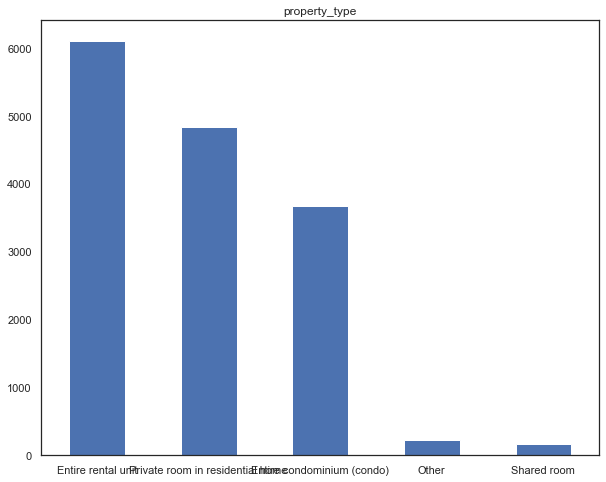

Entire rental unit                  0.406995
Private room in residential home    0.322365
Entire condominium (condo)          0.244878
Other                               0.014817
Shared room                         0.010946
Name: property_type, dtype: float64


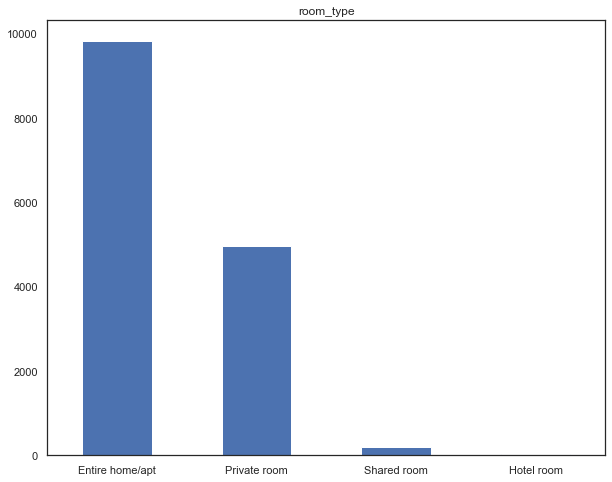

Entire home/apt    0.655276
Private room       0.330908
Shared room        0.012481
Hotel room         0.001335
Name: room_type, dtype: float64


In [1103]:
for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(10,8))
    print(listings_raw[col].value_counts(normalize=True))

In [1104]:
listings_raw.neighbourhood_cleansed.value_counts()

Waterfront Communities-The Island      2640
Niagara                                 585
Annex                                   479
Church-Yonge Corridor                   477
Bay Street Corridor                     437
Trinity-Bellwoods                       414
Dovercourt-Wallace Emerson-Junction     380
Kensington-Chinatown                    374
Moss Park                               346
Willowdale East                         343
South Riverdale                         299
Little Portugal                         287
Palmerston-Little Italy                 248
South Parkdale                          236
Mimico (includes Humber Bay Shores)     178
Mount Pleasant West                     169
Roncesvalles                            163
Cabbagetown-South St.James Town         155
Dufferin Grove                          154
York University Heights                 153
University                              152
Islington-City Centre West              146
North St.James Town             

In [1105]:
# Calculating the average price by neighbourhood_cleansed
var = listings_raw.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending=False)[:]
print(var)

neighbourhood_cleansed
Bridle Path-Sunnybrook-York Mills      237.769231
Princess-Rosethorn                     181.692308
Waterfront Communities-The Island      180.415152
Beechborough-Greenbrook                163.076923
Niagara                                161.042735
Casa Loma                              159.849057
Rosedale-Moore Park                    157.060606
The Beaches                            156.814815
Forest Hill South                      154.190476
Edenbridge-Humber Valley               152.666667
Bay Street Corridor                    152.597254
South Riverdale                        151.916388
Lawrence Park South                    146.097561
Woodbine Corridor                      144.333333
Yonge-Eglinton                         142.014706
Moss Park                              141.208092
Markland Wood                          140.000000
Annex                                  139.402923
Etobicoke West Mall                    139.242424
Leaside-Bennington         

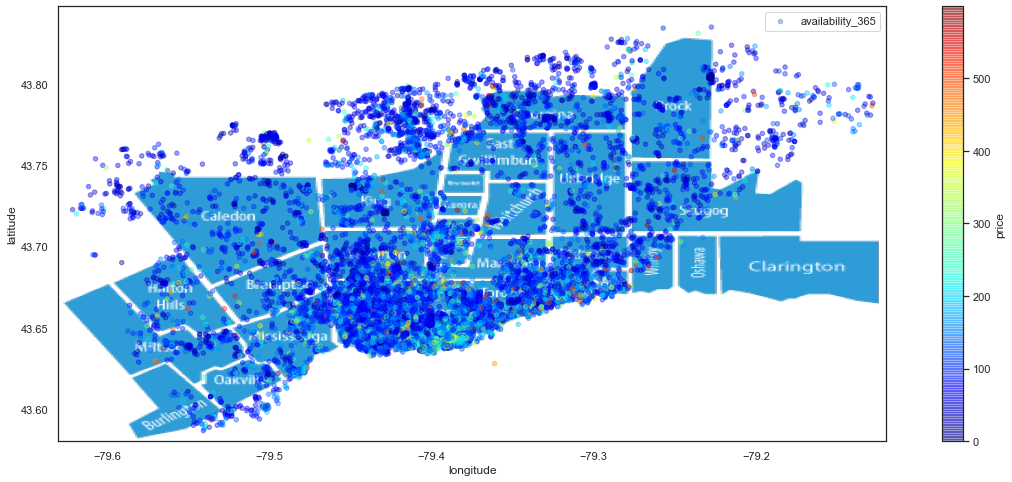

In [1106]:
import urllib
plt.figure(figsize=(20,8))
i=urllib.request.urlopen('http://toronto.nustreamrealty.com/wp-content/uploads/gta-map-legend.png')
to_img=plt.imread(i)
plt.imshow(to_img,zorder=0,extent=[-79.63, -79.12, 43.58,43.83])
ax=plt.gca()
listings_raw.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()

In [1107]:
listings_raw = pd.get_dummies(data= listings_raw, columns=['neighbourhood_cleansed','property_type', 'room_type'],drop_first=True)

In [1108]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,bathroom_qty,bathroom_type,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,...,neighbourhood_cleansed_South Riverdale,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,0,1.0,1,1,43.64590,-79.42423,10,5.0,7.0,469.0,28,730,1,0,7,0,0,5.00,5.000000,5.000000,5.00000,5.000000,5.0000,5.000000,0,3,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8077,0,2.0,1,0,43.64080,-79.37673,2,1.0,1.0,96.0,180,365,1,365,169,0,0,4.84,4.810000,4.890000,4.87000,4.900000,4.9200,4.830000,1,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
23691,0,2.0,1,1,43.69805,-79.45411,3,1.0,1.0,72.0,28,28,1,365,217,0,0,4.75,4.730000,4.820000,4.90000,4.930000,4.3400,4.730000,1,1,shared,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
27423,0,1.0,1,1,43.66884,-79.32725,1,1.0,1.0,45.0,365,365,1,280,26,0,0,4.92,5.000000,4.820000,5.00000,5.000000,4.8200,4.820000,0,1,private,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
30931,0,2.0,1,0,43.64015,-79.37625,2,1.0,2.0,128.0,180,365,1,365,1,0,0,5.00,4.769723,4.670465,4.82889,4.829864,4.8189,4.682635,0,1.5,private,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1109]:
listings_raw.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,14983.0,0.3,0.4,0.0,0.0,0.0,1.0,1.0
host_total_listings_count,14983.0,6.2,21.2,0.0,1.0,1.0,4.0,272.0
host_has_profile_pic,14983.0,1.0,0.1,0.0,1.0,1.0,1.0,1.0
host_identity_verified,14983.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
latitude,14983.0,43.7,0.0,43.6,43.6,43.7,43.7,43.8
longitude,14983.0,-79.4,0.1,-79.6,-79.4,-79.4,-79.4,-79.1
accommodates,14983.0,3.0,1.9,0.0,2.0,2.0,4.0,16.0
bedrooms,14983.0,1.4,0.8,1.0,1.0,1.0,2.0,9.0
beds,14983.0,1.6,1.0,1.0,1.0,1.0,2.0,18.0
price,14983.0,127.8,90.4,0.0,65.0,100.0,159.0,599.0


In [1110]:
listings_raw.describe().round(1)

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,...,neighbourhood_cleansed_South Riverdale,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,...,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0,14983.0
mean,0.3,6.2,1.0,0.8,43.7,-79.4,3.0,1.4,1.6,127.8,26.2,67440.0,1.0,130.8,26.5,4.2,0.5,4.6,4.8,4.7,4.8,4.8,4.8,4.7,0.3,0.9,0.1,0.2,0.1,0.5,0.1,0.7,0.5,0.6,0.8,0.3,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.3,0.0,0.0,0.3,0.0
std,0.4,21.2,0.1,0.4,0.0,0.1,1.9,0.8,1.0,90.4,40.0,8169590.9,0.2,134.7,53.8,11.3,1.5,0.6,0.4,0.5,0.4,0.4,0.3,0.4,0.4,0.3,0.3,0.4,0.3,0.5,0.2,0.4,0.5,0.5,0.4,0.5,0.4,...,0.1,0.0,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.2,0.1,0.0,0.4,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.5,0.1,0.5,0.1,0.0,0.5,0.1
min,0.0,0.0,0.0,0.0,43.6,-79.6,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,1.0,1.0,43.6,-79.4,2.0,1.0,1.0,65.0,5.0,90.0,1.0,0.0,1.0,0.0,0.0,4.6,4.8,4.7,4.8,4.8,4.8,4.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,1.0,1.0,43.7,-79.4,2.0,1.0,1.0,100.0,28.0,1125.0,1.0,86.0,6.0,0.0,0.0,4.7,4.8,4.7,4.9,4.9,4.8,4.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,..

In [1111]:
vars = listings_raw.groupby(['bathroom_qty']).price.mean().sort_values(ascending=False)[:]
print(vars)

bathroom_qty
5.5    461.000000
6      437.000000
4      332.518519
4.5    304.956522
3.5    266.225352
3      264.333333
2.5    245.336032
7.5    228.000000
5      205.500000
2      189.191884
1.5    122.771195
1      110.851826
0       94.173913
Name: price, dtype: float64


In [1112]:
listings_raw.drop('bathroom_qty', axis=1, inplace=True)

In [1113]:
vans = listings_raw.groupby(['bathroom_type']).price.mean().sort_values(ascending=False)[:]
print(vans)

bathroom_type
private    144.917823
shared      61.908209
Name: price, dtype: float64


In [1114]:
listings_raw = pd.get_dummies(data= listings_raw, columns=['bathroom_type'],drop_first=True)

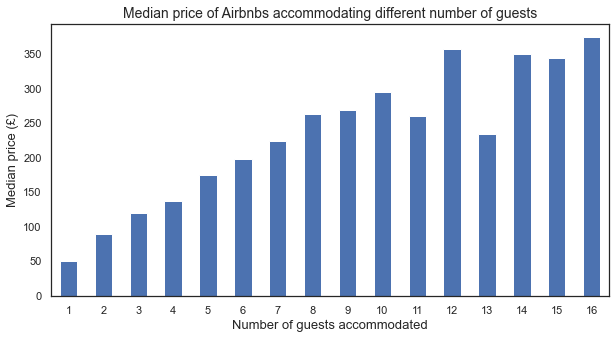

In [1115]:
plt.figure(figsize=(10,5))
listings_raw.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

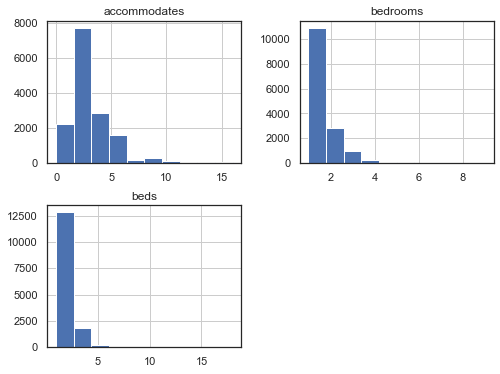

In [1116]:
listings_raw[['accommodates','bedrooms', 'beds']].hist(figsize=(8,6));

In [1117]:
# Calculating the average price by property types
var = listings_raw.groupby(['bedrooms']).price.mean().sort_values(ascending=False)[:]
print(var)

bedrooms
9.0    362.800000
8.0    315.000000
5.0    310.384615
4.0    298.637450
6.0    284.758621
7.0    278.666667
3.0    234.676221
2.0    173.487787
1.0    101.452488
Name: price, dtype: float64


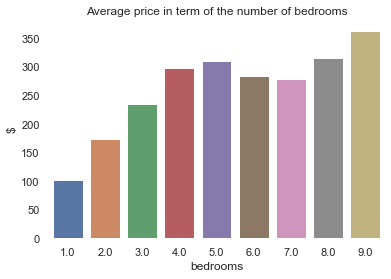

In [1118]:
# Plotting the average price by type of property
ax = sns.barplot(var.index, var) 
ax.set_title('Average price in term of the number of bedrooms')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

In [1119]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings_raw.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings_raw.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price ($)')
    ax2.set_xlabel('')
    
    plt.show()

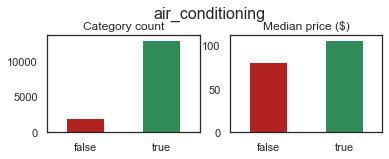

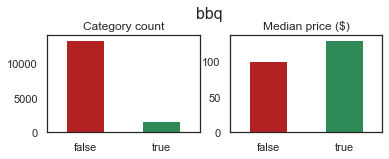

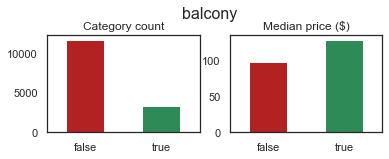

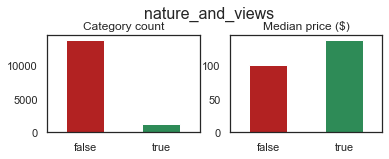

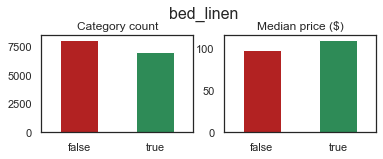

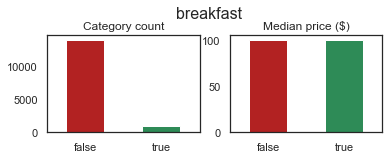

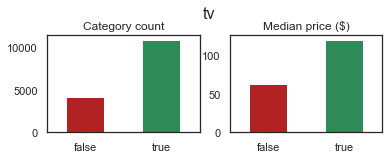

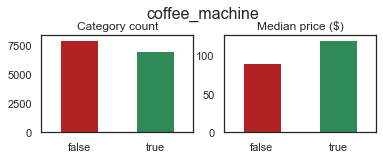

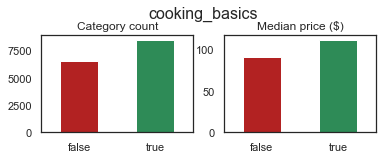

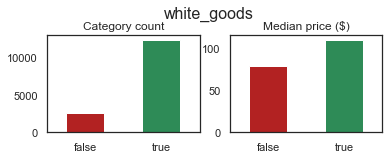

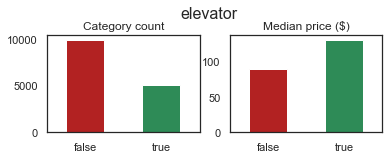

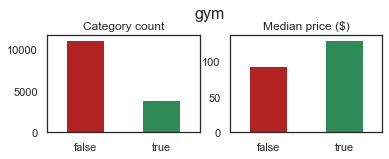

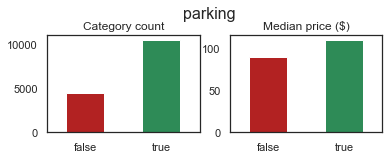

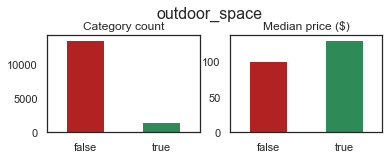

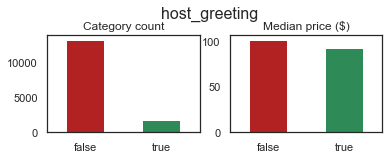

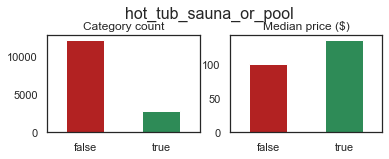

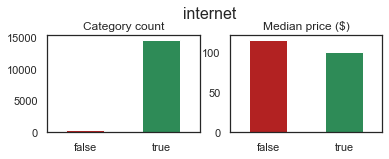

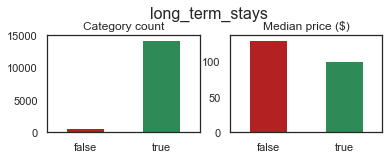

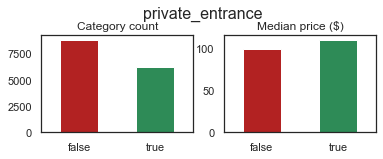

In [1120]:
for col in listings_raw.iloc[:,25:44].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [1121]:
def multi_collinearity_heatmap(listings_raw, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the listings.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = listings_raw.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

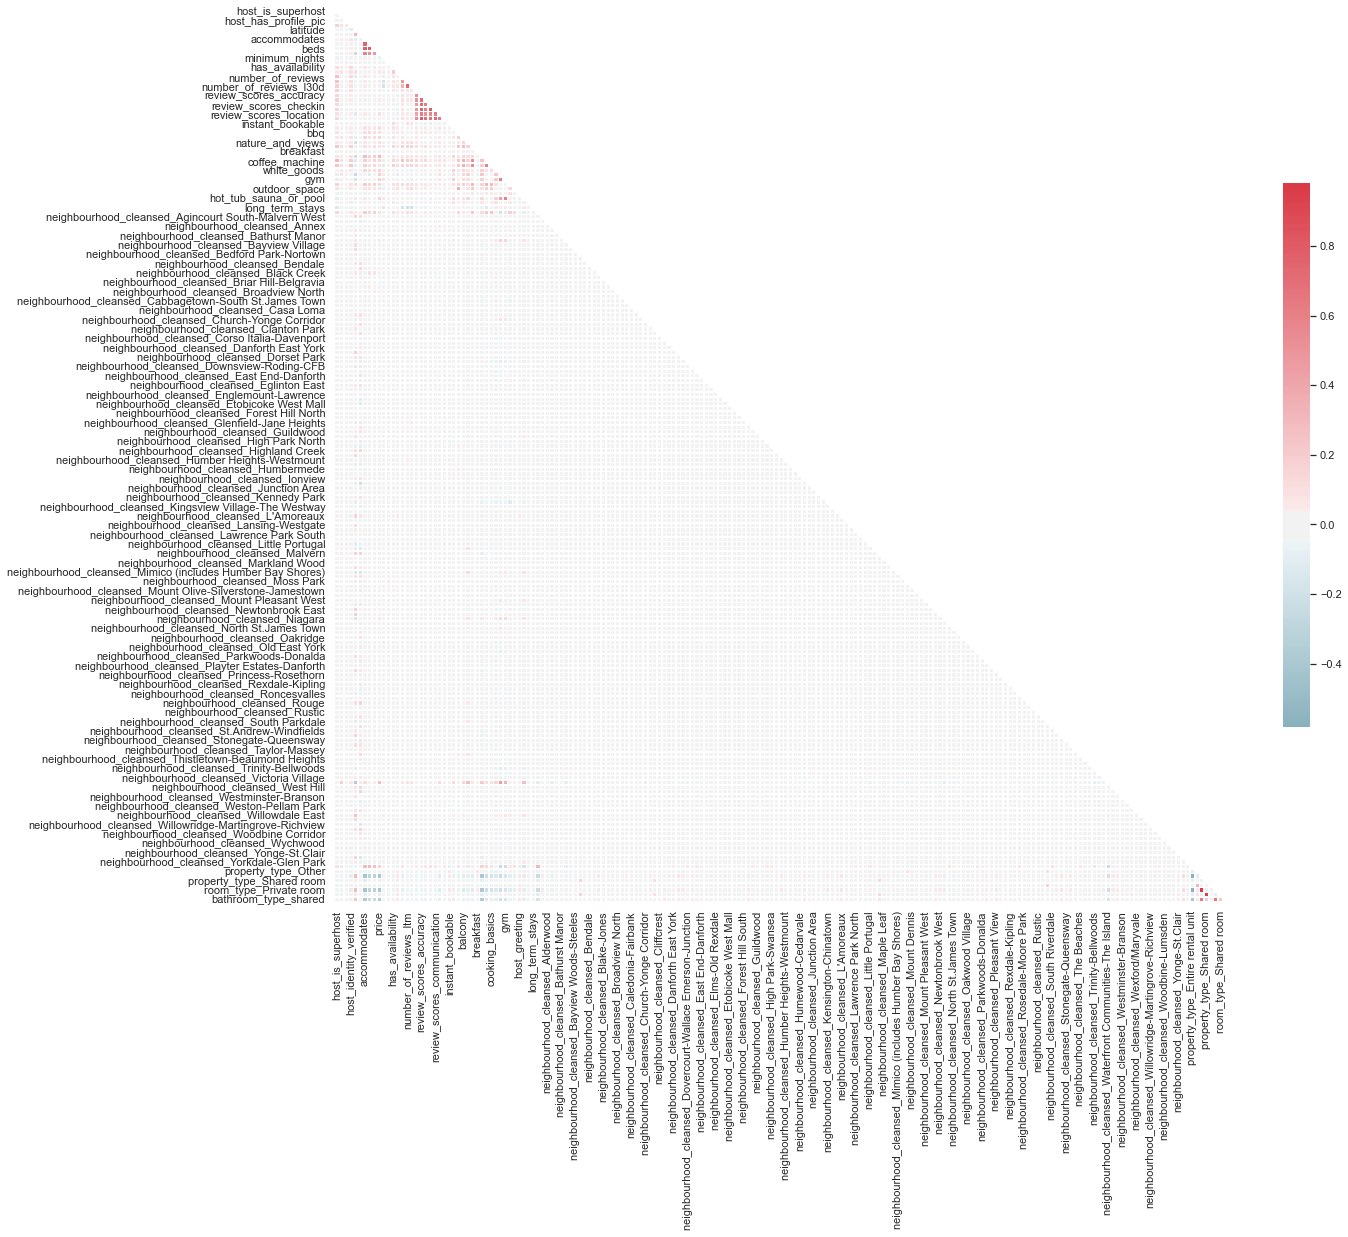

In [1122]:
multi_collinearity_heatmap(listings_raw, figsize=(20,20))

In [1123]:
# Dropping collinear features
to_drop = ['beds',
           'review_scores_location','review_scores_checkin','review_scores_cleanliness','review_scores_value']

listings_raw.drop(to_drop, axis=1, inplace=True)

# 3. Building Models

In [1124]:
listings_raw.head()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_communication,instant_bookable,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,...,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_shared
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,0,1.0,1,1,43.64590,-79.42423,10,5.0,469.0,28,730,1,0,7,0,0,5.00,5.000000,5.000000,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8077,0,2.0,1,0,43.64080,-79.37673,2,1.0,96.0,180,365,1,365,169,0,0,4.84,4.810000,4.900000,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
23691,0,2.0,1,1,43.69805,-79.45411,3,1.0,72.0,28,28,1,365,217,0,0,4.75,4.730000,4.930000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
27423,0,1.0,1,1,43.66884,-79.32725,1,1.0,45.0,365,365,1,280,26,0,0,4.92,5.000000,5.000000,0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30931,0,2.0,1,0,43.64015,-79.37625,2,1.0,128.0,180,365,1,365,1,0,0,5.00,4.769723,4.829864,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 3.1 Features scaling:

In [1125]:
target_column = ['price'] 
predictors = list(set(list(listings_raw.columns))-set(target_column))
listings_raw[predictors] = listings_raw[predictors]/listings_raw[predictors].max()
listings_raw.describe()

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_communication,instant_bookable,air_conditioning,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,...,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_shared
count,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,1.498300e+04,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,...,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000
mean,0.264633,0.022740,0.995595,0.841153,0.996509,1.003394,0.187225,0.154568,127.776280,0.023324,6.744000e-05,0.955616,0.358239,0.031949,0.022560,0.030344,0.929789,0.953873,0.965916,0.274378,0.862511,0.109124,0.222919,0.080825,0.463993,0.062271,0.726423,0.467530,0.565841,0.825469,0.340386,0.255890,0.704265,0.096242,0.117667,0.190282,0.971434,...,0.002403,0.003871,0.005139,0.004272,0.001936,0.009010,0.001068,0.001669,0.027631,0.010145,0.002269,0.176200,0.003404,0.004872,0.002670,0.002403,0.004005,0.005206,0.022893,0.007275,0.003404,0.004538,0.005206,0.001669,0.004939,0.004538,0.003471,0.010212,0.005339,0.406995,0.014817,0.322365,0.010946,0.001335,0.330908,0.012481,0.206501
std,0.441152,0.078109,0.066226,0.365545,0.001122,0.000836,0.117739,0.084671,90.414843,0.035571,8.169591e-03,0.205953,0.369079,0.064959,0.060164,0.086189,0.126711,0.079117,0.074143,0.446215,0.344375,0.311805,0.416219,0.272575,0.498718,0.241654,0.445809,0.498961,0.495663,0.379578,0.473855,0.436375,0.456388,0.294933,0.322224,0.392537,0.166588,...,0.048960,0.062099,0.071506,0.065219,0.043953,0.094497,0.032662,0.

## 3.2 Using all features

In [1126]:
# Splitting the data to train and test sets

X = listings_raw.drop('price',axis=1)
y = listings_raw.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape); print(X_test.shape)

(11986, 185)
(2997, 185)


In [1127]:
listings_raw[predictors].head()

,neighbourhood_cleansed_Dufferin Grove,cooking_basics,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_Milliken,neighbourhood_cleansed_Mimico (includes Humber Bay Shores),neighbourhood_cleansed_Pelmo Park-Humberlea,neighbourhood_cleansed_Regent Park,neighbourhood_cleansed_Humber Heights-Westmount,review_scores_communication,neighbourhood_cleansed_Bayview Woods-Steeles,review_scores_rating,neighbourhood_cleansed_Lawrence Park South,accommodates,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Pleasant View,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Don Valley Village,neighbourhood_cleansed_Newtonbrook East,neighbourhood_cleansed_Bedford Park-Nortown,neighbourhood_cleansed_University,neighbourhood_cleansed_Dovercourt-Wallace Emerson-Junction,neighbourhood_cleansed_Morningside,neighbourhood_cleansed_Mount Olive-Silverstone-Jamestown,neighbourhood_cleansed_Mount Pleasant East,neighbourhood_cleansed_Guildwood,neighbourhood_cleansed_Parkwoods-Donalda,neighbourhood_cleansed_Downsview-Roding-CFB,neighbourhood_cleansed_Beechborough-Greenbrook,neighbourhood_cleansed_Greenwood-Coxwell,neighbourhood_cleansed_Eringate-Centennial-West Deane,neighbourhood_cleansed_Long Branch,neighbourhood_cleansed_Humewood-Cedarvale,neighbourhood_cleansed_Victoria Village,elevator,neighbourhood_cleansed_Edenbridge-Humber Valley,bedrooms,neighbourhood_cleansed_New Toronto,...,neighbourhood_cleansed_Alderwood,availability_365,neighbourhood_cleansed_Islington-City Centre West,neighbourhood_cleansed_L'Amoreaux,neighbourhood_cleansed_Malvern,neighbourhood_cleansed_Oakridge,neighbourhood_cleansed_Scarborough Village,neighbourhood_cleansed_Runnymede-Bloor West Village,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Roncesvalles,neighbourhood_cleansed_Kingsview Village-The Westway,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Humbermede,neighbourhood_cleansed_Englemount-Lawrence,neighbourhood_cleansed_Leaside-Bennington,longitude,outdoor_space,neighbourhood_cleansed_Agincourt South-Malvern West,room_type_Private room,neighbourhood_cleansed_Danforth,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Rouge,coffee_machine,neighbourhood_cleansed_Oakwood Village,neighbourhood_cleansed_Cabbagetown-South St.James Town,neighbourhood_cleansed_Rustic,neighbourhood_cleansed_West Humber-Clairville,host_greeting,neighbourhood_cleansed_Clairlea-Birchmount,neighbourhood_cleansed_Briar Hill-Belgravia,neighbourhood_cleansed_Caledonia-Fairbank,number_of_reviews_ltm,property_type_Other,tv,neighbourhood_cleansed_Playter Estates-Danforth,neighbourhood_cleansed_Lawrence Park North,neighbourhood_cleansed_Brookhaven-Amesbury
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,1.000,0.0,0.6250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555556,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.003744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.980000,0.0,0.968,0.0,0.1250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.111111,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.003143,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.986000,0.0,0.950,0.0,0.1875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.004121,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.984,0.0,0.0625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,...,0.0,0.767123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 3.2.1 Linear Regression

In [1128]:
import time
lr_start = time.time()

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)
pred_test_lr= lr.predict(X_test)

lr_end = time.time()

print("\nTraining MSE value: ",round(mean_squared_error(y_train,pred_train_lr),2))
print("Validation MSE value:",round(mean_squared_error(y_test,pred_test_lr),2))
print("\nTraining RMSE value: ",round(np.sqrt(mean_squared_error(y_train,pred_train_lr)),2))
print("Validation RMSE value:",round(np.sqrt(mean_squared_error(y_test,pred_test_lr)),2)) 
print("\nTraining R2 value: ", round(r2_score(y_train, pred_train_lr),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_lr),2))
print(f"\nTime taken to run the model: {round((lr_end - lr_start)/60,2)} minutes")


Training MSE value:  3944.23
Validation MSE value: 4572220940.41

Training RMSE value:  62.8
Validation RMSE value: 67618.2

Training R2 value:  0.51
Validation R2 value: -542775.61

Time taken to run the model: 0.0 minutes


### 3.2.2 Ridge Regression

In [1129]:
rr_start = time.time()

rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
pred_test_rr= rr.predict(X_test)

rr_end = time.time()

print("\nTraining MSE value: ", round(mean_squared_error(y_train,pred_train_rr),2))
print("Validation MSE value:", round(mean_squared_error(y_test,pred_test_rr),2)) 
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y_train,pred_train_rr)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test,pred_test_rr)),2)) 
print("\nTraining R2 value: ", round(r2_score(y_train, pred_train_rr),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_rr),2))
print(f"\nTime taken to run the model: {round((rr_end - rr_start)/60,2)} minutes")


Training MSE value:  3956.0
Validation MSE value: 4400.54

Training RMSE value:  62.9
Validation RMSE value: 66.34

Training R2 value:  0.51
Validation R2 value: 0.48

Time taken to run the model: 0.0 minutes


### 3.2.3 Lasso Regression

In [1130]:
model_lasso_start = time.time()

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
pred_test_lasso= model_lasso.predict(X_test)

model_lasso_end = time.time()

print("\nTraining MSE value :", round(mean_squared_error(y_train,pred_train_lasso),2))
print("Validation MSE value:", round(mean_squared_error(y_test,pred_test_lasso),2)) 
print("\nTraining RMSE value :", round(np.sqrt(mean_squared_error(y_train,pred_train_lasso)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test,pred_test_lasso)),2)) 
print("\nTraining R2 value :", round(r2_score(y_train, pred_train_lasso),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_lasso),2))

print(f"\nTime taken to run the model: {round((model_lasso_end - model_lasso_start)/60,2)} minutes")



Training MSE value : 3963.06
Validation MSE value: 4390.47

Training RMSE value : 62.95
Validation RMSE value: 66.26

Training R2 value : 0.51
Validation R2 value: 0.48

Time taken to run the model: 0.05 minutes


### 3.2.4 XGBoost

In [1131]:
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [1132]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg= xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print("\nTraining MSE value: ", round(mean_squared_error(y_train, training_preds_xgb_reg),2))
print("Validation MSE value:", round(mean_squared_error(y_test, val_preds_xgb_reg),2))
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y_train, training_preds_xgb_reg)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),2))
print("\nTraining R2 value: ", round(r2_score(y_train, training_preds_xgb_reg),2))
print("Validation R2 value:", round(r2_score(y_test, val_preds_xgb_reg),2))

print(f"\nTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,2)} minutes")


Training MSE value:  1457.22
Validation MSE value: 3863.77

Training RMSE value:  38.17
Validation RMSE value: 62.16

Training R2 value:  0.82
Validation R2 value: 0.54

Time taken to run: 0.14 minutes


## 3.3 Selecting important features

In [1133]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [1134]:
# Apply SelectKBest class to extract top best features:
bestfeatures = SelectKBest(score_func=chi2, k=60)
fit = bestfeatures.fit(X,y)

In [1135]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [1136]:
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['specs','Score'] # naming the dataframe columns

In [1137]:
featureScores

,specs,Score
0,host_is_superhost,546.970348
1,host_total_listings_count,543.967842
2,host_has_profile_pic,2.508461
3,host_identity_verified,99.911585
4,latitude,0.002736
5,longitude,0.000297
6,accommodates,467.704548
7,bedrooms,235.316890
8,minimum_nights,24.370065
9,maximum_nights,112.202598


In [1138]:
print(featureScores.nlargest(164,'Score')) # print top 164 features

                                                 specs        Score
184                               bathroom_type_shared  4523.969877
180                          property_type_Shared room  4480.634015
179     property_type_Private room in residential home  4110.150138
182                             room_type_Private room  4073.010030
183                              room_type_Shared room  3976.131966
181                               room_type_Hotel room  2743.822684
136          neighbourhood_cleansed_Princess-Rosethorn  2490.967319
73     neighbourhood_cleansed_Edenbridge-Humber Valley  2128.568270
159  neighbourhood_cleansed_Waterfront Communities-...  2122.180071
112               neighbourhood_cleansed_Markland Wood  2121.564650
53   neighbourhood_cleansed_Bridle Path-Sunnybrook-...  1767.539406
46         neighbourhood_cleansed_Bedford Park-Nortown  1655.338137
110                     neighbourhood_cleansed_Malvern  1550.657761
144                      neighbourhood_cleansed_

In [1139]:
#Droping 21 non important features:
listings_raw2 = listings_raw.copy()
listings_raw2 = listings_raw2.drop(columns=['longitude','latitude','host_has_profile_pic','review_scores_communication','review_scores_accuracy',
                                           'review_scores_rating','internet','has_availability','minimum_nights','long_term_stays','host_identity_verified',
                                           'air_conditioning','maximum_nights','number_of_reviews','neighbourhood_cleansed_Forest Hill North','neighbourhood_cleansed_Humber Summit',
                                           'white_goods','neighbourhood_cleansed_Humber Heights-Westmount','neighbourhood_cleansed_Henry Farm','neighbourhood_cleansed_Cliffcrest',
                                           'number_of_reviews_ltm'])

In [1140]:
listings_raw2.describe()

,host_is_superhost,host_total_listings_count,accommodates,bedrooms,price,availability_365,number_of_reviews_l30d,instant_bookable,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,elevator,gym,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,private_entrance,neighbourhood_cleansed_Agincourt South-Malvern West,neighbourhood_cleansed_Alderwood,neighbourhood_cleansed_Annex,neighbourhood_cleansed_Banbury-Don Mills,neighbourhood_cleansed_Bathurst Manor,neighbourhood_cleansed_Bay Street Corridor,neighbourhood_cleansed_Bayview Village,neighbourhood_cleansed_Bayview Woods-Steeles,neighbourhood_cleansed_Bedford Park-Nortown,neighbourhood_cleansed_Beechborough-Greenbrook,neighbourhood_cleansed_Bendale,neighbourhood_cleansed_Birchcliffe-Cliffside,neighbourhood_cleansed_Black Creek,neighbourhood_cleansed_Blake-Jones,...,neighbourhood_cleansed_St.Andrew-Windfields,neighbourhood_cleansed_Steeles,neighbourhood_cleansed_Stonegate-Queensway,neighbourhood_cleansed_Tam O'Shanter-Sullivan,neighbourhood_cleansed_Taylor-Massey,neighbourhood_cleansed_The Beaches,neighbourhood_cleansed_Thistletown-Beaumond Heights,neighbourhood_cleansed_Thorncliffe Park,neighbourhood_cleansed_Trinity-Bellwoods,neighbourhood_cleansed_University,neighbourhood_cleansed_Victoria Village,neighbourhood_cleansed_Waterfront Communities-The Island,neighbourhood_cleansed_West Hill,neighbourhood_cleansed_West Humber-Clairville,neighbourhood_cleansed_Westminster-Branson,neighbourhood_cleansed_Weston,neighbourhood_cleansed_Weston-Pellam Park,neighbourhood_cleansed_Wexford/Maryvale,neighbourhood_cleansed_Willowdale East,neighbourhood_cleansed_Willowdale West,neighbourhood_cleansed_Willowridge-Martingrove-Richview,neighbourhood_cleansed_Woburn,neighbourhood_cleansed_Woodbine Corridor,neighbourhood_cleansed_Woodbine-Lumsden,neighbourhood_cleansed_Wychwood,neighbourhood_cleansed_Yonge-Eglinton,neighbourhood_cleansed_Yonge-St.Clair,neighbourhood_cleansed_York University Heights,neighbourhood_cleansed_Yorkdale-Glen Park,property_type_Entire rental unit,property_type_Other,property_type_Private room in residential home,property_type_Shared room,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathroom_type_shared
count,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,...,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000,14983.000000
mean,0.264633,0.022740,0.187225,0.154568,127.776280,0.358239,0.030344,0.274378,0.109124,0.222919,0.080825,0.463993,0.062271,0.726423,0.467530,0.565841,0.340386,0.255890,0.704265,0.096242,0.117667,0.190282,0.413068,0.004538,0.001602,0.031970,0.003204,0.002002,0.029166,0.005339,0.003137,0.002937,0.000868,0.003537,0.004939,0.001669,0.003270,...,0.002403,0.003871,0.005139,0.004272,0.001936,0.009010,0.001068,0.001669,0.027631,0.010145,0.002269,0.176200,0.003404,0.004872,0.002670,0.002403,0.004005,0.005206,0.022893,0.007275,0.003404,0.004538,0.005206,0.001669,0.004939,0.004538,0.003471,0.010212,0.005339,0.406995,0.014817,0.322365,0.010946,0.001335,0.330908,0.012481,0.206501
std,0.441152,0.078109,0.117739,0.084671,90.414843,0.369079,0.086189,0.446215,0.311805,0.416219,0.2725

In [1141]:
y2 =listings_raw2.price
X2 =listings_raw2.drop('price',axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=42)
print(X2_train.shape); print(X2_test.shape)

(11986, 164)
(2997, 164)


### 3.3.1 Linear Regression

In [1142]:
import time
lr2_start = time.time()

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
pred_train_lr2= lr2.predict(X2_train)
pred_test_lr2= lr2.predict(X2_test)

lr2_end = time.time()

print("\nTraining MSE value: ",round(mean_squared_error(y2_train,pred_train_lr2),2))
print("Validation MSE value:",round(mean_squared_error(y2_test,pred_test_lr2),2))
print("\nTraining RMSE value: ",round(np.sqrt(mean_squared_error(y2_train,pred_train_lr2)),2))
print("Validation RMSE value:",round(np.sqrt(mean_squared_error(y2_test,pred_test_lr2)),2)) 
print("\nTraining R2 value: ", round(r2_score(y2_train, pred_train_lr2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_lr2),2))
print(f"\nTime taken to run the model: {round((lr2_end - lr2_start)/60,2)} minutes")


Training MSE value:  4045.69
Validation MSE value: 4510.13

Training RMSE value:  63.61
Validation RMSE value: 67.16

Training R2 value:  0.5
Validation R2 value: 0.46

Time taken to run the model: 0.0 minutes


### 3.3.2 Ridge Regression

In [1143]:
rr2_start = time.time()

rr2 = Ridge(alpha=0.01)
rr2.fit(X2_train, y2_train) 
pred_train_rr2= rr2.predict(X2_train)
pred_test_rr2= rr2.predict(X2_test)

rr2_end = time.time()

print("\nTraining MSE value: ", round(mean_squared_error(y2_train,pred_train_rr2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test,pred_test_rr2),2)) 
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y2_train,pred_train_rr2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test,pred_test_rr2)),2)) 
print("\nTraining R2 value: ", round(r2_score(y2_train, pred_train_rr2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_rr2),2))
print(f"\nTime taken to run the model: {round((rr2_end - rr2_start)/60,2)} minutes")


Training MSE value:  4045.69
Validation MSE value: 4510.07

Training RMSE value:  63.61
Validation RMSE value: 67.16

Training R2 value:  0.5
Validation R2 value: 0.46

Time taken to run the model: 0.0 minutes


### 3.3.3 Lasso Regression

In [1144]:
model_lasso2_start = time.time()

model_lasso2 = Lasso(alpha=0.01)
model_lasso2.fit(X2_train, y2_train) 
pred_train_lasso2= model_lasso2.predict(X2_train)
pred_test_lasso2= model_lasso2.predict(X2_test)

model_lasso2_end = time.time()

print("\nTraining MSE value :", round(mean_squared_error(y2_train,pred_train_lasso2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test,pred_test_lasso2),2)) 
print("\nTraining RMSE value :", round(np.sqrt(mean_squared_error(y2_train,pred_train_lasso2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test,pred_test_lasso2)),2)) 
print("\nTraining R2 value :", round(r2_score(y2_train, pred_train_lasso2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_lasso2),2))

print(f"\nTime taken to run the model: {round((model_lasso2_end - model_lasso2_start)/60,2)} minutes")


Training MSE value : 4052.8
Validation MSE value: 4502.59

Training RMSE value : 63.66
Validation RMSE value: 67.1

Training R2 value : 0.5
Validation R2 value: 0.47

Time taken to run the model: 0.05 minutes


### 3.3.4 XGBoost Regression

In [1145]:
xgb_reg2_start = time.time()

xgb_reg2 = xgb.XGBRegressor()
xgb_reg2.fit(X2_train, y2_train)
training_preds_xgb_reg2= xgb_reg2.predict(X2_train)
val_preds_xgb_reg2 = xgb_reg2.predict(X2_test)

xgb_reg2_end = time.time()

print("\nTraining MSE value: ", round(mean_squared_error(y2_train, training_preds_xgb_reg2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test, val_preds_xgb_reg2),2))
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y2_train, training_preds_xgb_reg2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test, val_preds_xgb_reg2)),2))
print("\nTraining R2 value: ", round(r2_score(y2_train, training_preds_xgb_reg2),2))
print("Validation R2 value:", round(r2_score(y2_test, val_preds_xgb_reg2),2))

print(f"\nTime taken to run: {round((xgb_reg2_end - xgb_reg2_start)/60,2)} minutes")


Training MSE value:  2146.21
Validation MSE value: 4182.72

Training RMSE value:  46.33
Validation RMSE value: 64.67

Training R2 value:  0.74
Validation R2 value: 0.5

Time taken to run: 0.11 minutes


## 3.4 Models Comparison

In [1146]:
print('\n-----------------------------------------  Linear Regression  -----------------------------------------')

print('\n Model results using all features -----------------------------------------')

print("\nTraining MSE value: ",round(mean_squared_error(y_train,pred_train_lr),2))
print("Validation MSE value:",round(mean_squared_error(y_test,pred_test_lr),2))
print("\nTraining RMSE value: ",round(np.sqrt(mean_squared_error(y_train,pred_train_lr)),2))
print("Validation RMSE value:",round(np.sqrt(mean_squared_error(y_test,pred_test_lr)),2)) 
print("\nTraining R2 value: ", round(r2_score(y_train, pred_train_lr),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_lr),2))
print(f"\nTime taken to run the model: {round((lr_end - lr_start)/60,2)} minutes")

print('\n Model results using important features -----------------------------------------')

print("\nTraining MSE value: ",round(mean_squared_error(y2_train,pred_train_lr2),2))
print("Validation MSE value:",round(mean_squared_error(y2_test,pred_test_lr2),2))
print("\nTraining RMSE value: ",round(np.sqrt(mean_squared_error(y2_train,pred_train_lr2)),2))
print("Validation RMSE value:",round(np.sqrt(mean_squared_error(y2_test,pred_test_lr2)),2)) 
print("\nTraining R2 value: ", round(r2_score(y2_train, pred_train_lr2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_lr2),2))
print(f"\nTime taken to run the model: {round((lr2_end - lr2_start)/60,2)} minutes")

print('\n\n-----------------------------------------  Ridge Regression -----------------------------------------')

print('\n Model results using all features -----------------------------------------')

print("\nTraining MSE value: ", round(mean_squared_error(y_train,pred_train_rr),2))
print("Validation MSE value:", round(mean_squared_error(y_test,pred_test_rr),2)) 
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y_train,pred_train_rr)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test,pred_test_rr)),2)) 
print("\nTraining R2 value: ", round(r2_score(y_train, pred_train_rr),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_rr),2))
print(f"\nTime taken to run the model: {round((rr_end - rr_start)/60,2)} minutes")

print('\n Model results using important features -----------------------------------------')

print("\nTraining MSE value: ", round(mean_squared_error(y2_train,pred_train_rr2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test,pred_test_rr2),2)) 
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y2_train,pred_train_rr2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test,pred_test_rr2)),2)) 
print("\nTraining R2 value: ", round(r2_score(y2_train, pred_train_rr2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_rr2),2))
print(f"\nTime taken to run the model: {round((rr2_end - rr2_start)/60,2)} minutes")

print('\n\n----------------------------------------- Lasso Regression -----------------------------------------')

print('\n Model results using all features -----------------------------------------')

print("\nTraining MSE value :", round(mean_squared_error(y_train,pred_train_lasso),2))
print("Validation MSE value:", round(mean_squared_error(y_test,pred_test_lasso),2)) 
print("\nTraining RMSE value :", round(np.sqrt(mean_squared_error(y_train,pred_train_lasso)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test,pred_test_lasso)),2)) 
print("\nTraining R2 value :", round(r2_score(y_train, pred_train_lasso),2))
print("Validation R2 value:", round(r2_score(y_test, pred_test_lasso),2))

print(f"\nTime taken to run the model: {round((model_lasso_end - model_lasso_start)/60,2)} minutes")

print('\n Model results using important features -----------------------------------------')

print("\nTraining MSE value :", round(mean_squared_error(y2_train,pred_train_lasso2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test,pred_test_lasso2),2)) 
print("\nTraining RMSE value :", round(np.sqrt(mean_squared_error(y2_train,pred_train_lasso2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test,pred_test_lasso2)),2)) 
print("\nTraining R2 value :", round(r2_score(y2_train, pred_train_lasso2),2))
print("Validation R2 value:", round(r2_score(y2_test, pred_test_lasso2),2))

print(f"\nTime taken to run the model: {round((model_lasso2_end - model_lasso2_start)/60,2)} minutes")

print('\n\n-----------------------------------------  XGBoost Regression -----------------------------------------')

print('\n Model results using all features -----------------------------------------')

print("\nTraining MSE value: ", round(mean_squared_error(y_train, training_preds_xgb_reg),2))
print("Validation MSE value:", round(mean_squared_error(y_test, val_preds_xgb_reg),2))
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y_train, training_preds_xgb_reg)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y_test, val_preds_xgb_reg)),2))
print("\nTraining R2 value: ", round(r2_score(y_train, training_preds_xgb_reg),2))
print("Validation R2 value:", round(r2_score(y_test, val_preds_xgb_reg),2))

print(f"\nTime taken to run: {round((xgb_reg_end - xgb_reg_start)/60,2)} minutes")

print('\n Model results using important features -----------------------------------------')

print("\nTraining MSE value: ", round(mean_squared_error(y2_train, training_preds_xgb_reg2),2))
print("Validation MSE value:", round(mean_squared_error(y2_test, val_preds_xgb_reg2),2))
print("\nTraining RMSE value: ", round(np.sqrt(mean_squared_error(y2_train, training_preds_xgb_reg2)),2))
print("Validation RMSE value:", round(np.sqrt(mean_squared_error(y2_test, val_preds_xgb_reg2)),2))
print("\nTraining R2 value: ", round(r2_score(y2_train, training_preds_xgb_reg2),2))
print("Validation R2 value:", round(r2_score(y2_test, val_preds_xgb_reg2),2))

print(f"\nTime taken to run: {round((xgb_reg2_end - xgb_reg2_start)/60,2)} minutes")


-----------------------------------------  Linear Regression  -----------------------------------------

 Model results using all features -----------------------------------------

Training MSE value:  3944.23
Validation MSE value: 4572220940.41

Training RMSE value:  62.8
Validation RMSE value: 67618.2

Training R2 value:  0.51
Validation R2 value: -542775.61

Time taken to run the model: 0.0 minutes

 Model results using important features -----------------------------------------

Training MSE value:  4045.69
Validation MSE value: 4510.13

Training RMSE value:  63.61
Validation RMSE value: 67.16

Training R2 value:  0.5
Validation R2 value: 0.46

Time taken to run the model: 0.0 minutes


-----------------------------------------  Ridge Regression -----------------------------------------

 Model results using all features -----------------------------------------

Training MSE value:  3956.0
Validation MSE value: 4400.54

Training RMSE value:  62.9
Validation RMSE value: 66.34

T